In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('female_birth.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Female_Births
Date,
1959-01-01,35
1959-02-01,32
1959-03-01,30
1959-04-01,31
1959-05-01,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
Female_Births    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


In [5]:
df.describe()

,Female_Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.tail()

,Female_Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


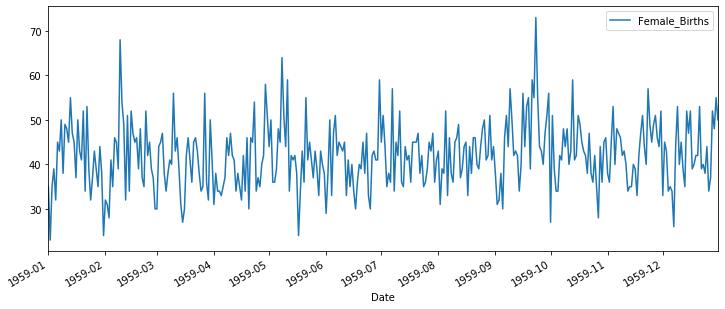

In [8]:
df.plot(figsize=(12,5))

#Checking for the stationarity

In [9]:
df_mean = df.rolling(window=30).mean()


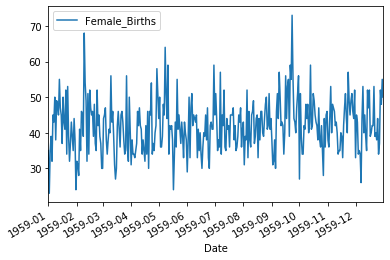

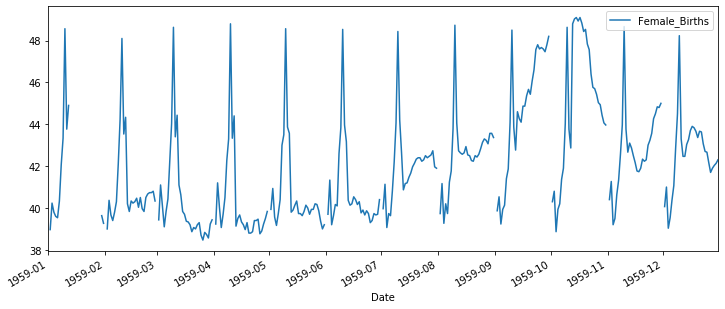

In [10]:
df.plot()
df_mean.plot(figsize=(12,5))


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adfuller(df['Female_Births'])

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [13]:
df.head()

,Female_Births
Date,
1959-01-01,35
1959-02-01,32
1959-03-01,30
1959-04-01,31
1959-05-01,44


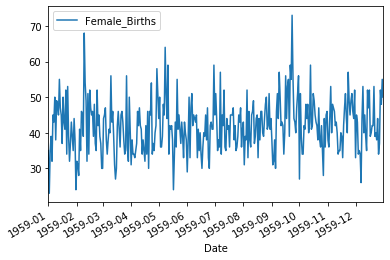

In [14]:
df.plot()

In [16]:
df['Forecast'] = df.shift(1)

In [17]:
df.head()

,Female_Births,Forecast
Date,,
1959-01-01,35,NaN
1959-02-01,32,35.0
1959-03-01,30,32.0
1959-04-01,31,30.0
1959-05-01,44,31.0


In [18]:
df_birth= df[1:]

In [19]:
df_birth.head()

,Female_Births,Forecast
Date,,
1959-02-01,32,35.0
1959-03-01,30,32.0
1959-04-01,31,30.0
1959-05-01,44,31.0
1959-06-01,29,44.0


In [20]:
df_birth.tail()

,Female_Births,Forecast
Date,,
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0
1959-12-30,55,48.0
1959-12-31,50,55.0


In [21]:
#finding the error
from sklearn.metrics import mean_squared_error

In [22]:
df_error = mean_squared_error(df_birth.Female_Births,df_birth.Forecast)

In [23]:
df_error

84.22252747252747

In [24]:
np.sqrt(df_error)

9.177283229394606

In [464]:
## Building ARIMA Model

In [25]:
#plotting acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [466]:
## acf plot ---> Q value
##Pacf plot ---> P value

In [27]:
df.drop(columns='Forecast',inplace=True)

In [28]:
df.head()

,Female_Births
Date,
1959-01-01,35
1959-02-01,32
1959-03-01,30
1959-04-01,31
1959-05-01,44


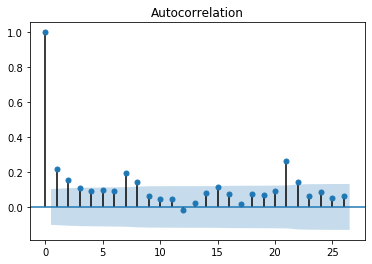

In [29]:
plot_acf(df); # to identify value of Q

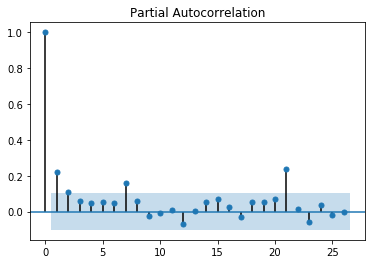

In [30]:
plot_pacf(df); # to Identify value of P

In [31]:
# p =2 or 3 & d =0 &  q = 3 or 4
df.size

365

In [32]:
train = df[0:330]
test = df[330:]

In [33]:
train.size

330

In [34]:
test.size

35

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2262.339479873941
(0, 0, 1) 2252.1193839939533
(0, 0, 2) 2249.2121284713357
(0, 1, 0) 2404.828232881607
(0, 1, 1) 2230.747353515652
(0, 1, 2) 2229.0976539247067
(0, 2, 0) 2751.529036816826
(0, 2, 1) 2406.3254514885425
(0, 2, 2) 2238.5114764872455
(1, 0, 0) 2249.060675199209
(1, 0, 1) 2236.6414066873813
(1, 1, 0) 2325.967017791805
(1, 1, 1) 2228.6330483293436
(1, 1, 2) 2230.355937675111
(1, 2, 0) 2570.657019586825
(2, 0, 0) 2246.272614849193
(2, 0, 1) 2235.630501118204
(2, 0, 2) 2236.356013669676
(2, 1, 0) 2297.661309964994
(2, 1, 1) 2229.141476446009
(2, 1, 2) 2229.8457045444075
(2, 2, 0) 2485.115303834883


In [50]:
from pmdarima import auto_arima

In [52]:
auto_arima(df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Sat, 18 Apr 2020   AIC                           2460.154
Time:                        20:14:14   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
from pmdarima.arima import auto_arima

In [21]:
auto_arima(df['Female_Births'],trace=True,seasonal=False).summary()

Performing stepwise search to minimize aic


C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=2463.066, BIC=2486.449, Time=0.849 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=2650.760, BIC=2658.555, Time=0.017 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=2565.234, BIC=2576.925, Time=0.073 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2463.584, BIC=2475.275, Time=0.165 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=2648.768, BIC=2652.665, Time=0.031 seconds


C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=2460.751, BIC=2480.237, Time=0.726 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2461.271, BIC=2480.757, Time=0.421 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=2460.154, BIC=2475.743, Time=0.252 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=2460.722, BIC=2476.311, Time=0.274 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=2536.154, BIC=2551.742, Time=0.206 seconds
Total fit time: 3.031 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Sun, 19 Apr 2020   AIC                           2460.154
Time:                        18:03:50   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model = ARIMA(train,order=(2,1,3))

C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [37]:
modelfit = model.fit()

In [38]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Female_Births   No. Observations:                  329
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1108.474
Method:                       css-mle   S.D. of innovations              6.965
Date:                Sat, 18 Apr 2020   AIC                           2230.948
Time:                        19:47:52   BIC                           2257.521
Sample:                             1   HQIC                          2241.549
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0194      0.018      1.097      0.273      -0.015       0.054
ar.L1.D.Female_Births    -0.6914      0.023    -29.583      0.000      -0.737      -0.646
ar.L2.D.Female_Births    -0.9416      0.021    -44.881      0.000      -0.983      -0.900
ma.L1.D.Female_Births    -0.2258      0.028     -8.089      0.000      -0.280      -0.171
ma.L2.D.Female_Births     0.2968      0.024     12.557      0.000       0.250       0.343
ma.L3.D.Female_Births    -0.9589      0.030    -31.741      0.000      -1.018      -0.900
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3671           -0.9630j            1.0306           -0.3080
AR.2           -0.3671           +0.9630j            1.0306            0.3080
MA.1           -0.3666           -0.9304j            1.0000           -0.3097
MA.2           -0.3666           +0.9304j            1.0000            0.3097
MA.3            1.0428           -0.0000j            1.0428           -0.0000
-----------------------------------------------------------------------------
"""

In [481]:
modelfit.aic

2230.9482611023973

In [39]:
prediction = modelfit.forecast(steps =35)[0]

In [40]:
prediction

array([45.30386339, 46.31050276, 43.64984901, 44.5925197 , 46.4969639 ,
       44.3437278 , 44.09025186, 46.34390271, 45.07548211, 43.88147897,
       45.95226807, 45.69583402, 43.97435672, 45.45697555, 46.1038289 ,
       44.31165026, 44.99265004, 46.26028223, 44.79369289, 44.66509192,
       46.18588976, 45.3065589 , 44.53357883, 45.94693706, 45.74860752,
       44.60596957, 45.63369175, 46.05003155, 44.84553382, 45.33727545,
       46.18241676, 45.18611964, 45.13017683, 46.1579332 , 45.55106067])

In [41]:
test

,Female_Births
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-01-12,45
1959-02-12,32
1959-03-12,46
1959-04-12,41
1959-05-12,34


In [42]:
np.sqrt(mean_squared_error(test,prediction))

6.860041231451653

In [45]:
prediction_1 = modelfit.predict(start=330,end=370)

C:\Users\arvin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [46]:
prediction_1

329   -3.696137
330    1.006639
331   -2.660654
332    0.942671
333    1.904444
334   -2.153236
335   -0.253476
336    2.253651
337   -1.268421
338   -1.194003
339    2.070789
340   -0.256434
341   -1.721477
342    1.482619
343    0.646853
344   -1.792179
345    0.681000
346    1.267632
347   -1.466589
348   -0.128601
349    1.520798
350   -0.879331
351   -0.772980
352    1.413358
353   -0.198330
354   -1.142638
355    1.027722
356    0.416340
357   -1.204498
358    0.491742
359    0.845141
360   -0.996297
361   -0.055943
362    1.027756
363   -0.606873
364   -0.497119
365    0.966103
366   -0.148853
367   -0.755726
368    0.713641
369    0.269183
dtype: float64